In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense

In [31]:
# Load the dataset
data = pd.read_csv('Dataset.csv')

In [32]:
# Preprocess the data
# Convert categorical variables to numerical using LabelEncoder
label_encoder = LabelEncoder()
data['model'] = label_encoder.fit_transform(data['model'])
data['transmission'] = label_encoder.fit_transform(data['transmission'])
data['fuelType'] = label_encoder.fit_transform(data['fuelType'])

In [33]:
# Split the data into features and target variable
X = data.drop('price', axis=1)
y = data['price']

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
# Build the neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [37]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [38]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 129043880.0000
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 20150804.0000
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 17452670.0000
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 16563027.0000
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 16106622.0000
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 15773970.0000
Epoch 7/100
1875/1875 [==============================] - 2s 1ms/step - loss: 15519835.0000
Epoch 8/100
1875/1875 [==============================] - 2s 1ms/step - loss: 15323113.0000
Epoch 9/100
1875/1875 [==============================] - 2s 1ms/step - loss: 15156997.0000
Epoch 10/100
1875/1875 [==============================] - 2s 1ms/step - loss: 15046029.0000
Epoch 11/100
1875/1875 [==============================] - 2s 1ms/step - loss: 14963059.0

In [39]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Mean Squared Error:', loss)


469/469 [==============================] - 0s 790us/step - loss: 10825439.0000
Mean Squared Error: 10825439.0


In [40]:
# Make predictions
predictions = model.predict(X_test)

469/469 [==============================] - 0s 777us/step


In [41]:
# Calculate R2 score
r2 = r2_score(y_test, predictions)
print('R2 Score:', r2)

R2 Score: 0.8703232685055875


In [46]:
# Reshape the y_test array to match the shape of predictions
y_test = np.array(y_test).reshape(-1, 1)

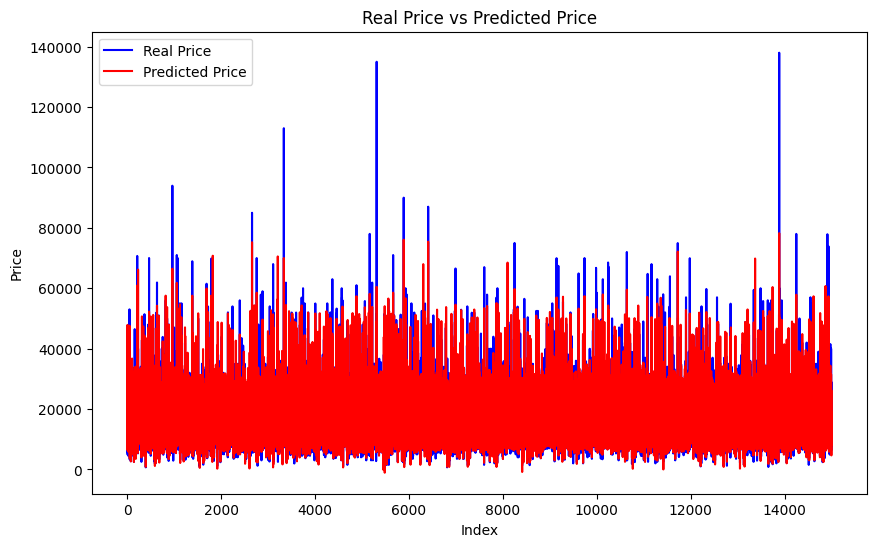

In [49]:
# Plot the real price and predicted price
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test.flatten(), color='blue', label='Real Price')
plt.plot(range(len(predictions)), predictions.flatten(), color='red', label='Predicted Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Real Price vs Predicted Price')
plt.legend()
plt.show()


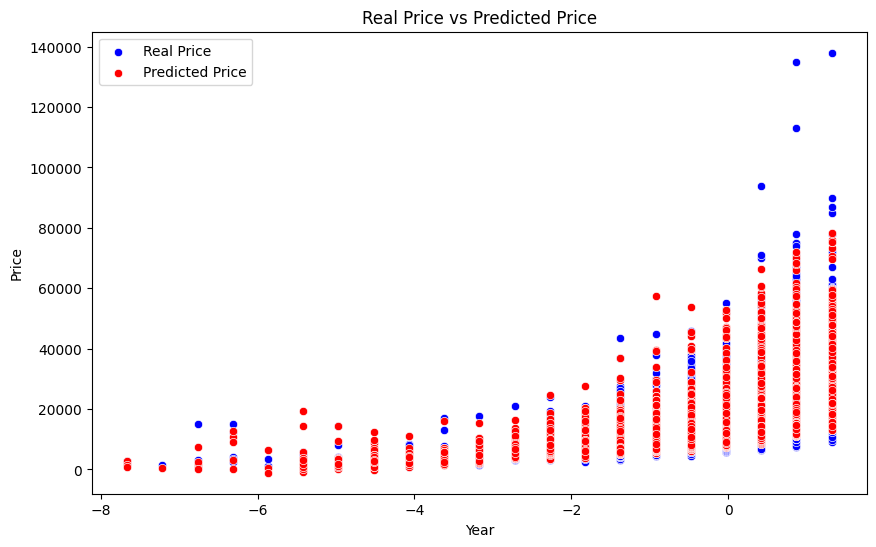

In [47]:
# Plot the real price and predicted price vs year
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:, 1], y=y_test.flatten(), color='blue', label='Real Price')
sns.scatterplot(x=X_test[:, 1], y=predictions.flatten(), color='red', label='Predicted Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Real Price vs Predicted Price')
plt.legend()
plt.show()

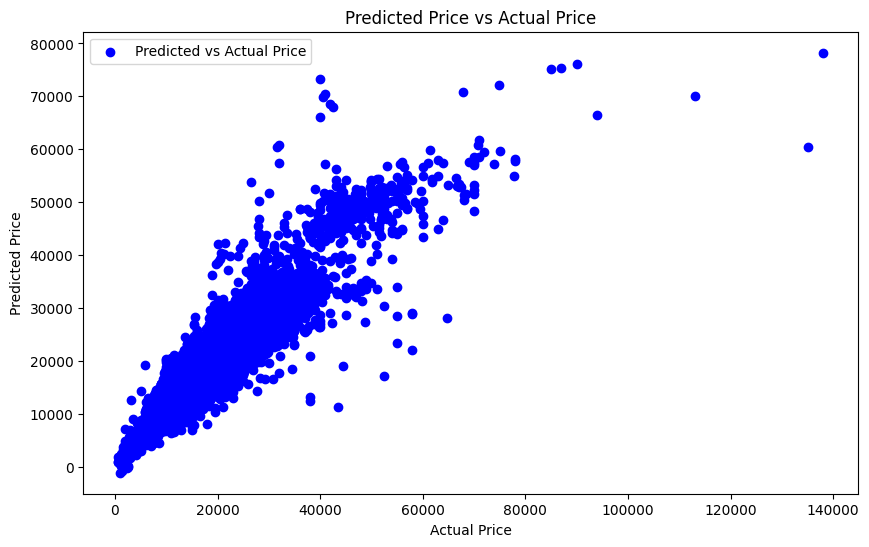

In [51]:
# Plot predicted price vs actual price
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions.flatten(), color='blue', label='Predicted vs Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted Price vs Actual Price')
plt.legend()
plt.show()